# The Iris Dataset
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The dataset contains a set of 150 records under five attributes - petal length, petal width, sepal length, sepal width and species.

### Specifying the TensorFlow version
Running `import tensorflow` will import the default version (currently 1.x). You can use 2.x by running a cell with the `tensorflow_version` magic **before** you run `import tensorflow`.

In [0]:
%tensorflow_version 2.x

### Import TensorFlow
Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


### Set random seed

In [0]:
tf.random.set_seed(42)

## Question 1

### Import dataset
- Import iris dataset
- Import the dataset using sklearn library

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [0]:
#iris_data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/R6/Internal/iris.csv')
#print("Shape: ",iris_data.shape)

In [0]:
# Import iris data from sklearn
from sklearn.datasets import load_iris
iris_df = load_iris()

In [9]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
iris_df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Question 2

### Get features and label from the dataset in separate variable
- you can get the features using .data method
- you can get the features using .target method

In [0]:
X = iris_df.data
Y = iris_df.target

## Question 3

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
N, D = X_train.shape

In [12]:
print(N, D)

112 4


## Question 4

### One-hot encode the labels
- convert class vectors (integers) to binary class matrix
- convert labels
- number of classes: 3
- we are doing this to use categorical_crossentropy as loss

In [13]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
# num_classes=3 because number of classess in target variable is 3.
y_train = np_utils.to_categorical(y_train,num_classes=3)
y_test = np_utils.to_categorical(y_test,num_classes=3)

## Question 5

### Initialize a sequential model
- Define a sequential model

In [0]:
# Clear previous model
keras.backend.clear_session()

#Initilization
model = keras.models.Sequential()

## Question 6

### Add a layer
- Use Dense Layer  with input shape of 4 (according to the feature set) and number of outputs set to 3
- Apply Softmax on Dense Layer outputs

In [0]:
model.add(keras.layers.Dense(4, input_shape=(D,), activation='relu')) #Input layer
model.add(keras.layers.Dense(4, input_shape=(D,), activation='relu')) #Hidden layer
model.add(keras.layers.Dense(3, input_shape=(D,), activation='softmax')) #Output layer

## Question 7

### Compile the model
- Use SGD as Optimizer
- Use categorical_crossentropy as loss function
- Use accuracy as metrics

In [0]:
sgdOptimizer = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgdOptimizer,loss='categorical_crossentropy',metrics=['accuracy'])

## Question 8

### Summarize the model
- Check model layers
- Understand number of trainable parameters

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


## Question 9

### Fit the model
- Give train data as training features and labels
- Epochs: 100
- Give validation data as testing features and labels

In [28]:
r = model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test))

Train on 112 samples, validate on 38 samples
Epoch 1/100
112/112 [==============================] - 0s 217us/sample - loss: 0.5265 - accuracy: 0.9018 - val_loss: 0.4878 - val_accuracy: 0.8421
Epoch 2/100
112/112 [==============================] - 0s 226us/sample - loss: 0.5254 - accuracy: 0.9018 - val_loss: 0.4864 - val_accuracy: 0.8421
Epoch 3/100
112/112 [==============================] - 0s 215us/sample - loss: 0.5242 - accuracy: 0.8929 - val_loss: 0.4852 - val_accuracy: 0.8421
Epoch 4/100
112/112 [==============================] - 0s 228us/sample - loss: 0.5229 - accuracy: 0.8929 - val_loss: 0.4841 - val_accuracy: 0.8421
Epoch 5/100
112/112 [==============================] - 0s 209us/sample - loss: 0.5220 - accuracy: 0.9018 - val_loss: 0.4826 - val_accuracy: 0.8421
Epoch 6/100
112/112 [==============================] - 0s 193us/sample - loss: 0.5205 - accuracy: 0.8929 - val_loss: 0.4815 - val_accuracy: 0.8421
Epoch 7/100
112/112 [==============================] - 0s 200us/sample - 

## Question 10

### Make predictions
- Predict labels on one row

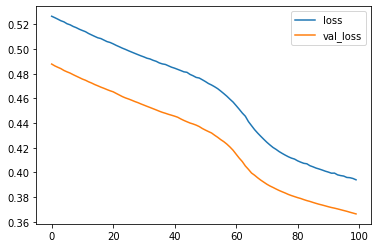

In [29]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

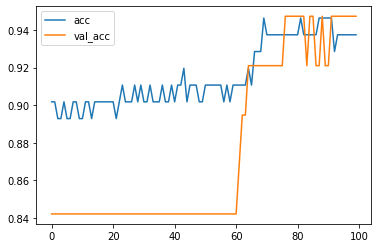

In [30]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [31]:
# Predictied Label
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
predicted_label = pred.idxmax(axis=1)
print("Predicted label for each row: ", list(predicted_label))

Predicted label for each row:  [1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0]


### Compare the prediction with actual label
- Print the same row as done in the previous step but of actual labels

In [63]:
# Actual Label
y_test = pd.DataFrame(y_test)
actual_label = y_test.idxmax(axis=1)
print("Actual label for each row: ", list(actual_label))

Actual label for each row:  [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0]


In [64]:
Combined_df = {"Actual": actual_label, "Predicted":predicted_label}
actual_and_predicted = pd.DataFrame(Combined_df)
actual_and_predicted.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [37]:
score =model.evaluate(X_test,y_test,verbose=1)
print(score)

38/38 [==============================] - 0s 140us/sample - loss: 0.3664 - accuracy: 0.9474
[0.3663953636821948, 0.94736844]




---



# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

### Specifying the TensorFlow version
Running `import tensorflow` will import the default version (currently 1.x). You can use 2.x by running a cell with the `tensorflow_version` magic **before** you run `import tensorflow`.

In [0]:
%tensorflow_version 2.x

### Import TensorFlow
Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [39]:
import tensorflow as tf
print(tf.__version__)

2.1.0


### Set random seed

In [0]:
tf.random.set_seed(42)

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [0]:
# run this cell to upload file if you are using google colab
from google.colab import files
files.upload()

Saving prices.csv to prices.csv


In [0]:
!ls

prices.csv  sample_data


In [0]:
keras.backend.clear_session()

In [42]:
prices_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/R6/Internal/prices.csv')
print("Shape: ",prices_df.shape)

Shape:  (851264, 7)


## Question 2

### Drop columnns
- drop "date" and "symbol" column from the data

In [43]:
prices_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [44]:
prices_df.drop(labels="date", axis=1, inplace=True)
prices_df.drop(labels="symbol", axis=1, inplace=True)
prices_df.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 3

### Take initial rows
- Take first 1000 rows from the data
- This step is done to make the execution faster

In [45]:
prices_df = prices_df.head(1000)
prices_df.shape

(1000, 5)

## Question 4

### Get features and label from the dataset in separate variable
- Take "open", "close", "low", "high" columns as features
- Take "volume" column as label
- Normalize label column by dividing it with 1000000

In [0]:
X = prices_df.drop(labels="volume",axis=1)
Y = prices_df["volume"]

In [48]:
Y = Y/1000000
Y

0       2.1636
1       2.3864
2       2.4895
3       2.0063
4       1.4086
        ...   
995     2.1332
996     1.9824
997    37.1528
998     6.5686
999     5.6043
Name: volume, Length: 1000, dtype: float64

## Question 5

### Convert data
- Convert features and labels to numpy array
- Convert their data type to "float32"

In [0]:
X = np.array(X)
Y = np.array(Y)

In [50]:
print("X[0]: ",X[0])
print("Y[0]: ",Y[0])
print("Len of X:{} and length of Y:{}".format(len(X), len(Y)))

X[0]:  [123.43     125.839996 122.309998 126.25    ]
Y[0]:  2.1636
Len of X:1000 and length of Y:1000


## Question 6

### Normalize data
- Normalize features
- Use tf.math.l2_normalize to normalize features
- You can read more about it here https://www.tensorflow.org/api_docs/python/tf/math/l2_normalize

In [51]:
X_normalized = tf.math.l2_normalize(X,axis=0)
X_normalized

<tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
array([[0.04405065, 0.0448811 , 0.04406771, 0.04469663],
       [0.04469661, 0.04279112, 0.04321381, 0.04444527],
       [0.04153459, 0.04099716, 0.04140873, 0.04239187],
       ...,
       [0.01010706, 0.01026088, 0.01009187, 0.01019968],
       [0.01570306, 0.01597802, 0.01576292, 0.01586421],
       [0.01287651, 0.01324606, 0.01297423, 0.01318064]])>

## Question 7

### Define weight and bias
- Initialize weight and bias with tf.zeros
- tf.zeros is an initializer that generates tensors initialized to 0
- Specify the value for shape

In [52]:
N,D = X_normalized.shape
D

4

In [0]:
#w = tf.Variable(tf.zeros(shape=(4,1)))
w = tf.Variable(tf.zeros(shape=(D,1)))
b = tf.Variable(tf.zeros(shape=(1)))

# Change dtype of w and b to float64, if not changed then error will be observed during matrix multiplication and error calculation beacause X_normalized and Y is of type float64
w = tf.dtypes.cast(w, tf.float64)
b = tf.dtypes.cast(b, tf.float64)

In [54]:
print("weight: ",w)
print("bias: ",b)

weight:  tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]], shape=(4, 1), dtype=float64)
bias:  tf.Tensor([0.], shape=(1,), dtype=float64)


## Question 8

### Get prediction
- Define a function to get prediction
- Approach: prediction = (X * W) + b; here is X is features

In [0]:
@tf.function
def predictionFunction(X, W, b):
  yhat = tf.add(tf.matmul(X, W), b)
  return yhat

### Calculate loss
- Calculate loss using predictions
- Define a function to calculate loss
- We are calculating mean squared error

In [0]:
@tf.function
def loss_function(Y_actual, Y_predicted):
  error = Y_actual - Y_predicted
  loss = tf.reduce_mean(tf.square(error))
  return loss

## Question 9

### Define a function to train the model
1.   Record all the mathematical steps to calculate Loss
2.   Calculate Gradients of Loss w.r.t weights and bias
3.   Update Weights and Bias based on gradients and learning rate to minimize loss

In [0]:
def train(X,Y, w,b,learning_rate = 0.1):
  
  with tf.GradientTape() as tape:
    tape.watch([w,b])
    Yhat = predictionFunction(X, w,b)
    loss = loss_function(Y, Yhat)
  
  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [w, b])
  
  #update the paramters using Gradient Descent  
  w = w - learning_rate * dW
  b = b - learning_rate * db

  return w, b

## Question 10

### Train the model for 100 epochs 
- Observe the training loss at every iteration

In [58]:
epochs = 1001
for i in range(epochs):
  w, b = train(X_normalized,Y, w,b)
  print("Training Loss on iteration ", i, loss_function(Y, predictionFunction(X_normalized, w,b)).numpy())

Training Loss on iteration  0 227.0995024181627
Training Loss on iteration  1 220.58708374087377
Training Loss on iteration  2 216.42386550096816
Training Loss on iteration  3 213.76242939917012
Training Loss on iteration  4 212.06104317411553
Training Loss on iteration  5 210.97339161966138
Training Loss on iteration  6 210.27808452045733
Training Loss on iteration  7 209.83359292662306
Training Loss on iteration  8 209.5494410977448
Training Loss on iteration  9 209.367790269313
Training Loss on iteration  10 209.2516656383063
Training Loss on iteration  11 209.17743018429303
Training Loss on iteration  12 209.1299733809353
Training Loss on iteration  13 209.09963546562182
Training Loss on iteration  14 209.08024120582797
Training Loss on iteration  15 209.06784293759264
Training Loss on iteration  16 209.05991702303058
Training Loss on iteration  17 209.05485016672475
Training Loss on iteration  18 209.05161103128802
Training Loss on iteration  19 209.04954030981696
Training Loss on

### Observe values of Weight
- Print the updated values

In [59]:
w

<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.08931312],
       [0.08951294],
       [0.08919306],
       [0.08964881]])>

### Observe values of Bias
- Print the updated values

In [60]:
b

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([5.30569373])>